In [13]:
#2. 

def solver_3d(n,A,b):
    '''
    solver function which returns the points which are the vertex of our polyhedron (this is the algorithm that has O(n^4) complexity)
    '''
    
    #test points is the intersection and sol is the points which satisfy all the constraints 
    test_points = [] 
    sol = []
    
    A_to_x = {} #dictionary 
    I = [] #unsorted
    equations = [] #sorted 
    l = 0 #iterating variable 
    
    for i in range(0,n-2):
        for j in range(i+1,n):
            for k in range(i+2,n):
                A0 = np.array([[A[i][0], A[i][1], A[i][2]], [A[j][0], A[j][1], A[j][2]], [A[k][0], A[k][1], A[k][2]]])
                B0 = np.array([b[i], b[j], b[k]])
                #throw exception if singular matrix error (linear equation is not solvable) 
                try: 
                    X = np.linalg.inv(A0).dot(B0) #solve the set of linear equation to obtain point. If not solvable, throw edception
                    test_points.append(X) 
                    point = check_ineq_3d(X[0],X[1],X[2],A,b)
                    if (point != [0,0,0]):
                        sol.append(point)  
                        #add a dictionary to keep track which points belongs to which index.
                        #organize the index afterwards and use the two to find which points to connect
                        I.append([i,j,k])
                        A_to_x[l] = [point]
                        l += 1
                except np.linalg.LinAlgError as err:
                    if 'Singular matrix' in str(err):
                        break
                    else: 
                        raise

    #check if points are on the same hyperplane as each other. If so, graph them 
    for i in range(0,len(I)):
        for j in range(i+1,len(I)):
            #temp variable 
            temp = 0 
            for k in range(0,3):
                for l in range(0,3):
                    if (I[i][k] == I[j][l]):
                        temp += 1
            if (temp >= 2):
                equations.append([i,j]) 
                    
#     print(I) #keep track of the index
#     print(len(I))
#     print(sol)         
#     print(len(sol))
#     print(equations) 
    
    return sol,equations,A_to_x

def equation(a1,a2,a3,b,x,y):
    '''
    returns the z value which allows us to graph 
    '''
    return -(a1*x + a2 * y - b) / a3

def graph_points(result,index,hashmap):
    '''
    scatter plot of points that we obtained from solving our equation plus lines connecting it 
    '''
    
    #define our variables so it's easier to understand 
    X = result 
    I = index 
    A_to_X = hashmap 
    l_bound = -4
    h_bound = 4
    
    plt.figure(figsize = (8,8))
    ax = plt.axes(projection='3d')
    
    for i in range(0,len(X)): #plot scatter 
        ax.scatter(X[i][0], X[i][1], X[i][2], color = 'pink')
            
    
    #print(A_to_X)
    
    #plot the lines between our points 
    for i in range(0,len(I)):
        point1 = A_to_X[I[i][0]] #return one point we want to plot
        point2 = A_to_X[I[i][1]] #return the other point we want to plot 
        ax.plot((point1[0][0],point2[0][0]),(point1[0][1],point2[0][1]),(point1[0][2],point2[0][2]),c = 'blue',alpha=0.25)
    

    plt.title('Polyhedron in 3-d')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_zlabel('z')
    ax.set_zlim3d(l_bound, h_bound)       
    ax.set_ylim3d(l_bound, h_bound)                   
    ax.set_xlim3d(l_bound, h_bound)
    ax.view_init(0,30)
    ax.view_init(10,160)

    
def check_ineq_3d(x,y,z,A,b):
    '''
    check the inequality constraints of a particular equation. If it fails a condition, return [0,0,0]
    '''
    for i in range(0,n): 
        left = A[i][0]*x + A[i][1]*y + A[i][2]*z
        left = round(left,3)
        if (left > b[i]):
            return [0,0,0]
    return [x,y,z]

vertex of the 3-d plot:  [[0.9305197902025071, 0.5627682325247425, -1.498756445833217], [0.7237652715935972, -1.5737952530503947, -0.44515100325669454], [1.6726723143989157, 0.375267186045914, 0.07237683127908964], [0.9358577403482237, -1.4722064894535825, -0.10187685692035178], [-0.1668072773165018, 1.4850499915320934, -1.7406793776256633], [0.07401148902219962, 1.6847776689710983, -0.3901941561644937], [-0.16094063271375303, 1.3552988595934479, -2.142093011371195], [1.360044771187927, 0.7687275602278967, 0.4251397223574893], [1.606232675244109, 0.48628025245335693, 0.23572978546024403], [-1.0557095039483104, 1.276602926365159, 0.19535362268566048], [-1.0217566039519101, 1.2930077106774995, 0.23190744546400988], [-2.0143803761388996, -0.08017718503551885, -1.0716162366172457], [-1.4165962683514264, 0.8378077782568343, -0.06832091530542872], [-2.0523115483241203, -0.32469455624230636, -1.6873441309936097], [-1.6256366554330914, -0.04561004744588426, 0.0760669304621937], [-0.21638435900

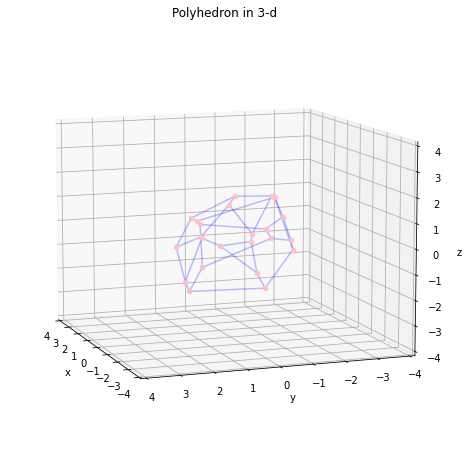

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 

n = 20
d = 3
A = np.random.randn(n, d)
A /= np.sqrt(np.sum(A**2, axis=1)).reshape(-1, 1)
b = 1 + np.random.random(n)

for i in range(0,len(b)):
    b[i] = round(b[i],3)

result_3d,index_3d,hashmap_3d = solver_3d(n,A,b) #obtain the verticies of our shape, dictionary of the values in hashmap, and index of our points in index

graph_points(result_3d,index_3d,hashmap_3d) #graph our shape 
print("vertex of the 3-d plot: ", result_3d)

In [529]:
#3 
'''
Minimize cTx 
subject to Ax = b and x >= 0 

adapt case for d = 2
'''
def solver_2d(n,A,b):
    '''
    solver function which returns the points which are the vertex of our polyhedron (this is the algorithm that has O(n^4) complexity)
    '''
    test_points = [] 
    sol = []
    
    #define a dictionary to keep track of our points we want to graph
    
    A_to_x = {} #dictionary 
    I = [] #unsorted
    equations = [] #sorted 
    k = 0 #iterating variable 
    
    for i in range(0,n):
        for j in range(0,n):
            A0 = np.array([[A[i][0], A[i][1]], [A[j][0], A[j][1]]])
            B0 = np.array([b[i], b[j]])
            #throw exception if singular matrix error (linear equation is not solvable) 
            try: 
                X = np.linalg.inv(A0).dot(B0) 
                test_points.append(X) 
                point = check_ineq(X[0],X[1],A,b)
                if (point != [0,0]):
                    #add a dictionary to keep track which points belongs to which index.
                    #organize the index afterwards and use the two to find which points to connect
                    sol.append(point)
                    I.append(i)
                    I.append(j)
                    A_to_x[k] = [point]
                    k += 1
            except np.linalg.LinAlgError as err:
                if 'Singular matrix' in str(err):
                    break
                else: 
                    raise
    
    #put the point and stuff into dictionary and index the list 
    
    for i in range(0,len(I)-1):
        for j in range(i+1,len(I)):
            if (I[i] == I[j]):
                i_point = int(i/2)
                j_point = int(j/2)
                equations.append(i_point)
                equations.append(j_point)
    
#     print(I)
#     print(sol)
#     print(equations)
    return sol,equations,A_to_x

def equation(a1,a2,b,x):
    '''
    returns the y value which allows us to graph (adapted for 2-d case)
    '''
    return -(np.multiply(a1,x) - b) / a2

    
def check_ineq(x,y,A,b):
    '''
    check the inequality constraints of a particular equation. Adapted for 2-d case 
    '''
    for i in range(0,n): 
        left = A[i][0]*x + A[i][1]*y
        left = round(left,3) #THIS CAUSED ME SO MUCH PAIN AND MISERY FUCK FLOATING POINT MULTIPLICATION 
        if (left > b[i]):
            return [0,0]
    return [x,y]

def cost_function(c,x,y):
    '''
    return the cost function for #3
    '''
    return c[0]*x + c[1]*y 

def minimizer(X,c):
    '''
    return the minimizer for the function to graph; performed by comparing the cost function value at each vertex
    '''
    #initialize our first point
    minimum = [X[0][0],X[0][1]]
    
    #compare with the rest of the points we have 
    for i in range(1,len(X)):
        test = cost_function(c,X[i][0],X[i][1])
        min_function = cost_function(c,minimum[0],minimum[1])
        if (test > min_function):
            minimum[0] = X[i][0]
            minimum[1] = X[i][1]
    return minimum

def grapher(X,I,H):
    '''
    scatter plot of points that we obtained from solving our equation plus lines connecting it. Adapted for 2-d case
    Note: I'm trying to find the minimizer so we can follow the negative gradient of the cost function which is just -c^T
    '''
    
    #generate points for our cost function 
    Nx = 1000 # number of points in the x axis
    Ny = 1000 
    
    # Set up Meshgrid and define cost function for contour sets 
    x,y = np.meshgrid(np.linspace(-10, 10, Nx),np.linspace(-10,10,Ny))
    z = cost_function(c,x,y)
    
    #obtain the minimizer using the gradient of cost function 
    m = minimizer(X,c)
    
    # set our index list and dictionary 
    index_list = I 
    A_to_X = H 
    
    #plot 
    plt.figure(figsize = (7,7))
    plt.contourf(x, y, z, levels = 30, cmap = 'cet_linear_bgy_10_95_c74_r' )
    
    #plot the scatter points
    for i in range(0,len(X)):
        plt.scatter(X[i][0], X[i][1],s = 60 , c = 'pink')
        
    #plot the lines between our points 
    for i in range(0,len(index_list),2):
        point1 = A_to_X[index_list[i]] #return one point we want to plot
        point2 = A_to_X[index_list[i+1]] #return the other point we want to plot 
        plt.plot((point1[0][0],point2[0][0]),(point1[0][1],point2[0][1]),c = 'red')
        
    #x_special = np.meshgrid(np.linspace(-6,6,100))
    #plotting all the points that are the intersection of two lines 
#     for i in range(0,len(X)*2):
#         plt.scatter(test_points[i][0],test_points[i][1],s = 25,c = 'red') 
#         index1 = A_to_X[i]
#         y1 = equation(index1[0],index1[1],index1[2],x_special)
#         plt.plot(x_special[0],y1[0],c='blue')
        
   
    plt.scatter( m[0], m[1], marker = '*', s = 100, c = 'orange', label = 'Minimizer', zorder=10)
    plt.colorbar() 
    plt.legend()
    plt.title('Minimizer in 2-d')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show(block=False) 
    

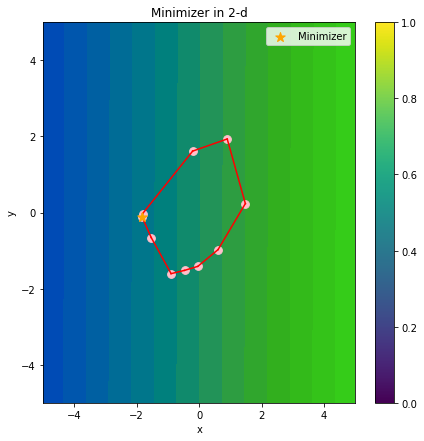

Number of Verticies:  10
Verticies of the 2-d plot:  [[-0.8985948281277261, -1.6058662463713962], [-1.8103928605428392, -0.027852076064051712], [-0.4693132131296345, -1.5198410597428245], [-1.8259189956416726, -0.12068943643948771], [-1.5356461509538715, -0.6565806992830137], [-0.2100850107386405, 1.6140061145152256], [-0.04386592339650264, -1.4142276285227484], [0.6040261125372823, -0.973893430412166], [0.8969507556666432, 1.933355320091325], [1.477470984698551, 0.23477176360946928]]


In [539]:
import numpy as np 
import matplotlib.pyplot as plt 
import colorcet as cc
from math import sqrt 

n = 20
d = 2
A = np.random.randn(n, d)
A /= np.sqrt(np.sum(A**2, axis=1)).reshape(-1, 1)
b = 1 + np.random.random(n)
c = np.random.randn(2) 

#truncate our b value so we'll have an easier time comparing floating points
for i in range(0,len(b)):
    b[i] = round(b[i],3)

result,index,hashmap = solver_2d(n,A,b) #obtain the verticies of our shape in result, dictinoary of the values in hashmap, and index of our points in index
grapher(result,index,hashmap) #graph our polygon and minimizer 

print("Number of Verticies: ", len(result))
print("Verticies of the 2-d plot: ", result) #print out the verticies 
